# __パラメータチューニング__
__1. MNSITデータセットをダウンロードして、CNNでの学習を行う。ハイパーパラメータは以下のとおりである__  
*****
|パラメータ|説明|選択肢|
|:-:|:-:|:--:|
|`--epoch`|エポック数|30で統一|
|`--num_layer`|畳み込みの数|5で統一| 
|`--activation`|活性化関数|`ReLU`,`ELU`|  
|`--optimizer`|最適化手法|`Adam`,`MomentumSGD`|  
|`--weight_decay`|重み減衰|1e-10 ~ 1e-3|  
|`--adam_lr`|adam学習率|1e-5 ~ 1e-1|  
|`--momentum_sgd_lr`|sgd学習率|1e-5 ~ 1e-1|   
|`--mid_units`|結合層のユニット数|100 ~ 500|  
|`--num_filter`|各層のフィルタ数|16 ~ 128 の list|

各種パラメータを変更しながら、lossやtestの精度がどのように変化するのかを考察する

****
まずは下表に示すデフォルトパラメータで学習を行う

|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-3|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.019322102228283827
validation_loss = 0.03793404225213453
test_acc = 0.9883


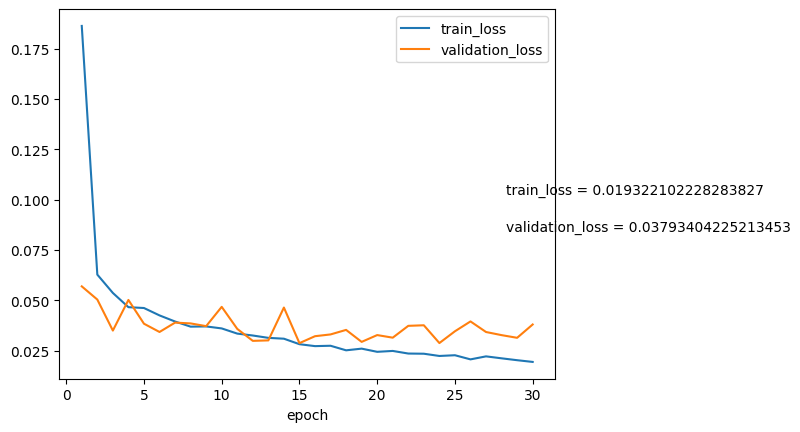

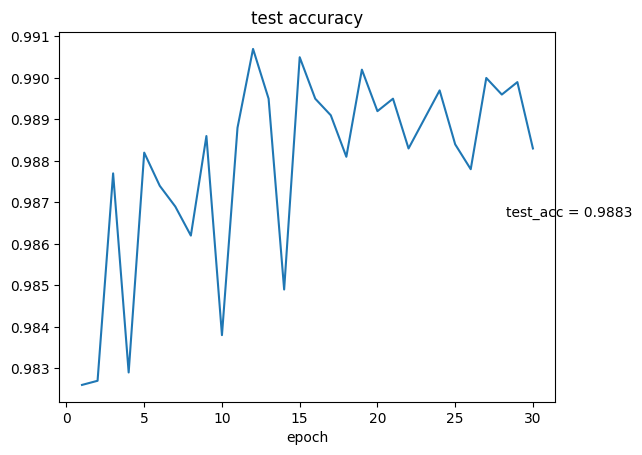

In [39]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-03 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 100 --num_filter 100.100.100.100.100.100

***
activationをeluにしてみる
|パラメータ|値|
|:-|-|
|activation|<span style="color:red;">elu</span>|
|optimizer|Adam|
|weight_decay|1e-3|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.024390103123428774
validation_loss = 0.040732915499527005
test_acc = 0.9872


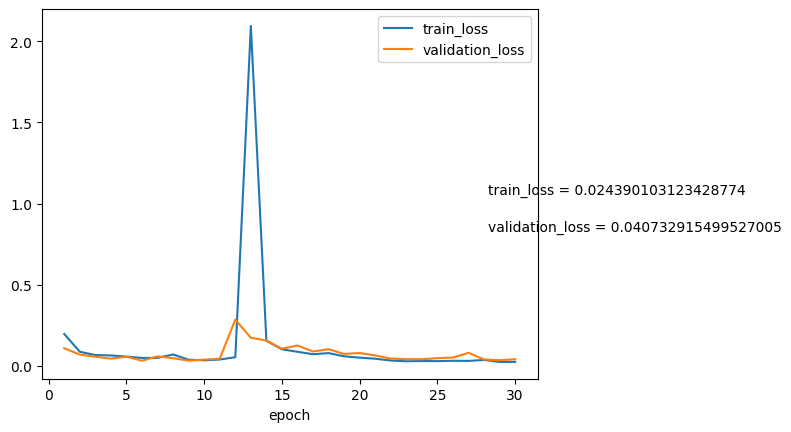

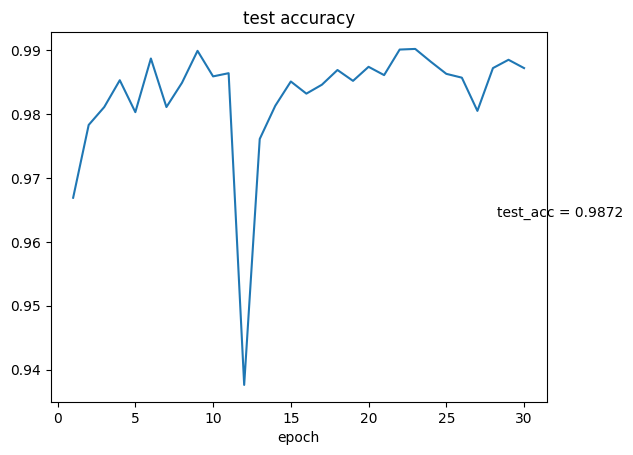

In [40]:
%run MNIST_train.py\
--epoch 30 --activation elu --optimizer Adam --weight_decay 1e-03 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 250 --num_filter 100.100.100.100.100.100

reluの場合に比べて精度が低下していることがわかる
****
optimizerをAdamからMomentumSGDに変更してみる

|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|<span style="color:red;">MomentumSGD</span>|
|weight_decay|1e-3|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|num_layer|5|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.03184591787286412
validation_loss = 0.046526879690471104
test_acc = 0.9865


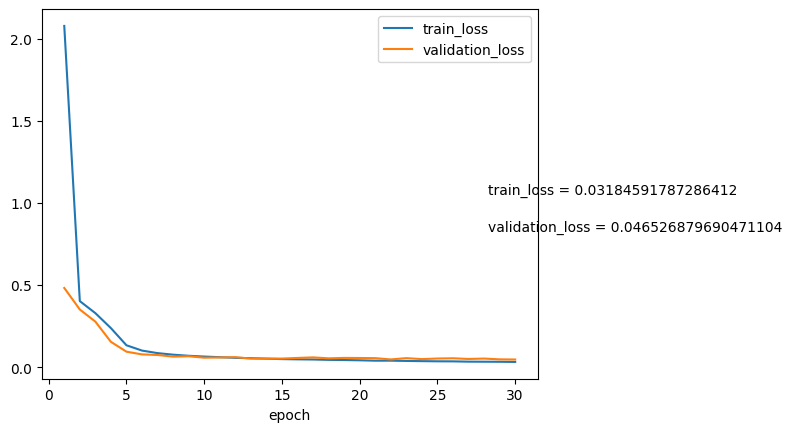

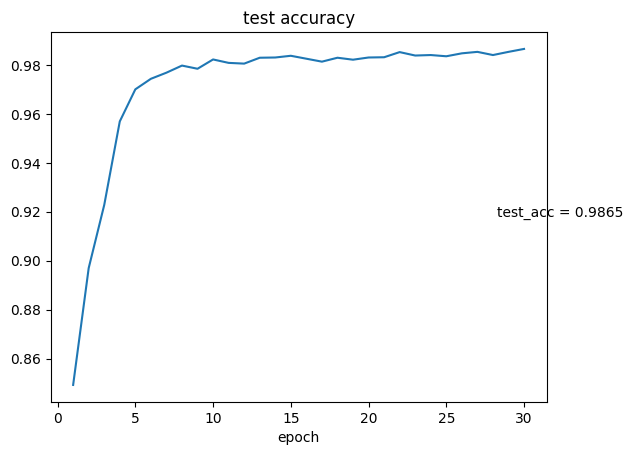

In [41]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer MomentumSGD --weight_decay 1e-03 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 250 --num_filter 100.100.100.100.100.100

***
重み減衰を1e-03の1/1000倍の1e-06に変更してみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|<span style="color:red;">1e-06</span>|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|num_layer|5|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.004457152545341221
validation_loss = 0.03924624563840057
test_acc = 0.9919


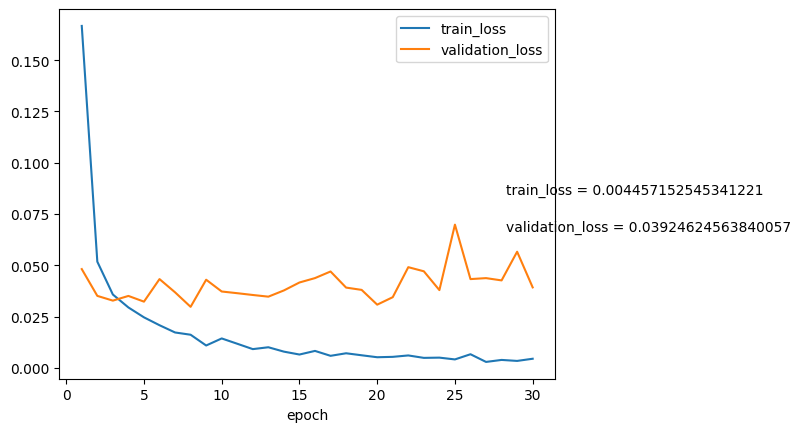

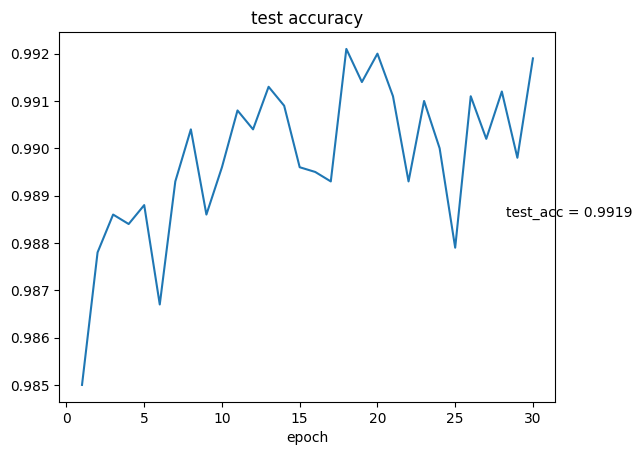

In [42]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-06 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 250 --num_filter 100.100.100.100.100.100

[******************************] 100.00% (30/30)

train_loss = 0.03208377264461903
validation_loss = 0.04486043466560077
test_acc = 0.9857


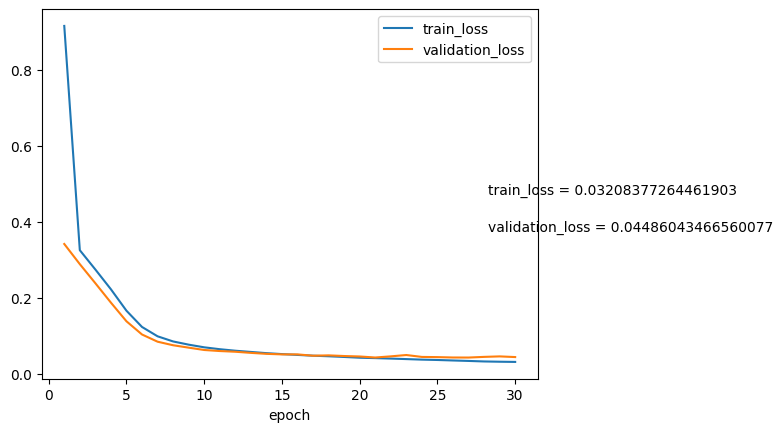

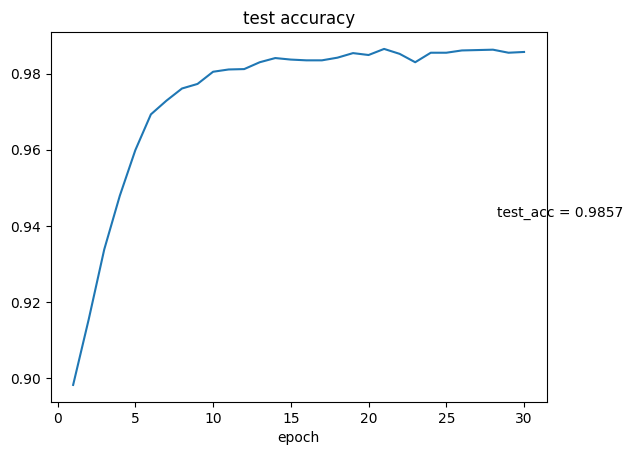

In [43]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-03 --adam_lr 1e-5 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 250 --num_filter 100.100.100.100.100.100

[******************************] 100.00% (30/30)

train_loss = 0.02082027613929014
validation_loss = 0.03331907230243087
test_acc = 0.9882


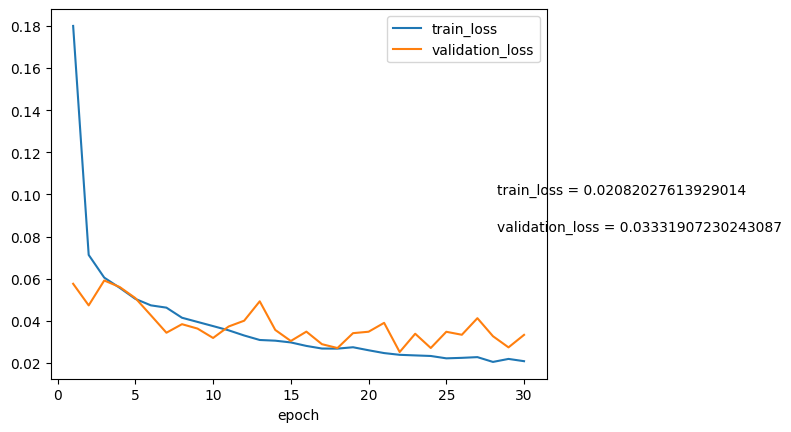

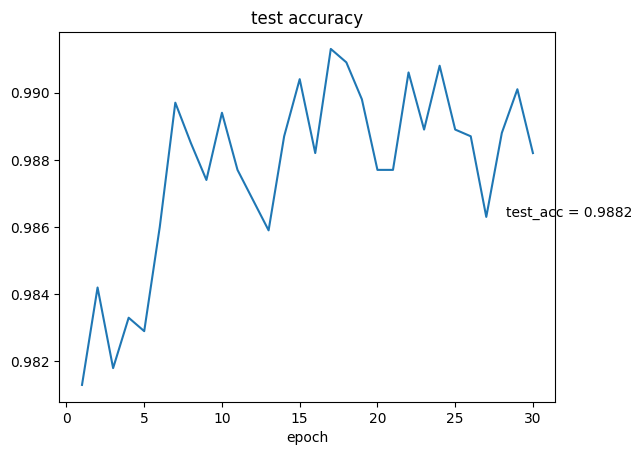

In [44]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-03 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 500 --num_filter 100.100.100.100.100.100

[******************************] 100.00% (30/30)

train_loss = 0.01972308421176352
validation_loss = 0.023661155657214113
test_acc = 0.992


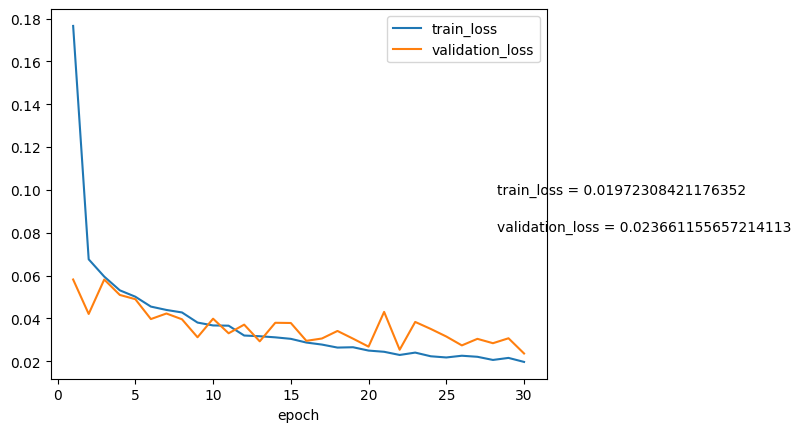

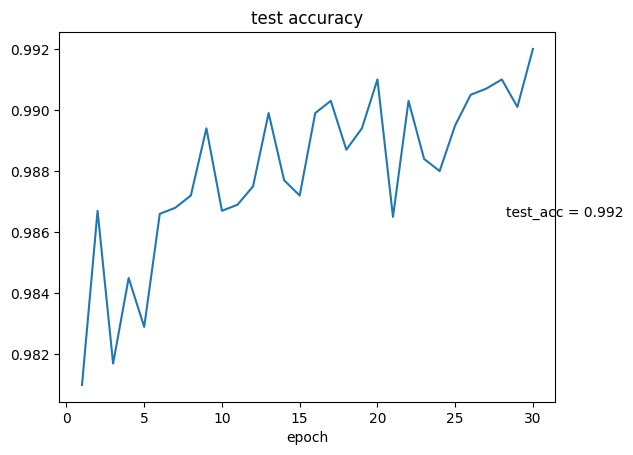

In [45]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-03 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 250 --num_filter 50.60.70.80.90.100

In [47]:
!nvidia-smi

Wed Jul 12 12:17:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        Off | 00000000:01:00.0  On |                  N/A |
| 32%   32C    P8              21W / 320W |   3502MiB / 16376MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--